## Theory

### Tests for numerical variables

#### **Pearson**
Measures the linear correlation between two datasets.
    
[Wiki](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
[Python](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html)
    
#### **Spearman**
Measures how well two variables can be related using a monotonic function.
    
[Wiki](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)
[Python](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.spearmanr.html)

***

### Tests for categorical variables

#### **Chi-Square test**
Measures the relationship of two categorical variables.
    
[Wiki](https://en.wikipedia.org/wiki/Chi-squared_test)
[Python](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html)
    
***

### Analysis of Variance

#### **ANOVA**
Tests the hypothesis that two or more groups have the same population mean.
    
[Wiki](https://en.wikipedia.org/wiki/Analysis_of_variance)
[Python](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.f_oneway.html)
    
#### **Kruskal-Wallis**
Tests the hypothesis that two or more groups have the same population median.
    
[Wiki](https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance)
[Python](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html)

***

### Goodness of fit

#### **Kolmogorov–Smirnov**
Tests whether two probability distributions are the same (thus, it can be applied as a goodness of fit measure).
    
[Wiki](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test)
[Python](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html)
    
#### **R²**
Measures how well the output of a regression is able to predict for given test data.
    
[Wiki](https://en.wikipedia.org/wiki/Coefficient_of_determination)
[Python](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

## Experiments

In [51]:
import numpy as np
import matplotlib.pylab as plt

from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr, kruskal, f_oneway, ks_2samp, chisquare

### Numerical data

In [41]:
x = np.linspace(0, 10, 501)

sin = np.sin(x)
cos = np.cos(x)
sin_times_2 = np.sin(x) * 2
linear = x
squared = x ** 2

function_pairs = [
    (sin, sin_times_2),
    (sin, cos),
    (linear, squared),
    (sin, squared)
]

<Figure size 432x288 with 0 Axes>

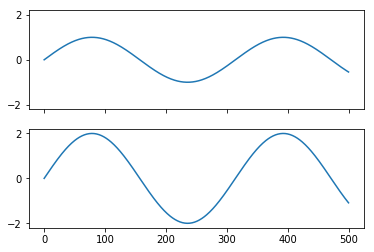

Pearson -> r = 1.0 | p = 0.0
Spearman -> r = 1.0 | p = 0.0
Kruskal -> r = 18.560560865713974 | p = 1.6459080293611837e-05
ANOVA -> r = 7.558227067894355 | p = 0.0060813261705498665





<Figure size 432x288 with 0 Axes>

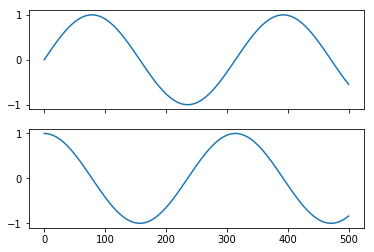

Pearson -> r = 0.05232382340221976 | p = 0.24238704859682575
Spearman -> r = 0.06457790395305009 | p = 0.14892318479857897
Kruskal -> r = 26.492728312248346 | p = 2.645320060776932e-07
ANOVA -> r = 29.175918466214913 | p = 8.260281375003388e-08





<Figure size 432x288 with 0 Axes>

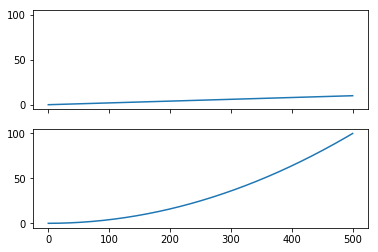

Pearson -> r = 0.9681251914670961 | p = 3.4914736306263135e-302
Spearman -> r = 1.0 | p = 0.0
Kruskal -> r = 250.34526562878267 | p = 2.1835787708972496e-56
ANOVA -> r = 446.5248686898818 | p = 3.112820468712888e-82





<Figure size 432x288 with 0 Axes>

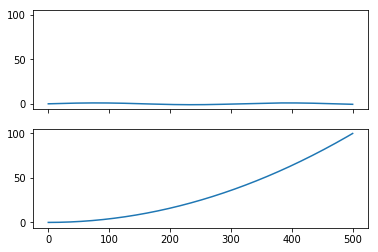

Pearson -> r = 0.03824688732999291 | p = 0.39296349122652807
Spearman -> r = -0.07454884653004748 | p = 0.09555797350469872
Kruskal -> r = 612.6665102835237 | p = 2.942928218031274e-135
ANOVA -> r = 616.4730126175436 | p = 2.1194795992973071e-106





In [42]:
for function_pair in function_pairs:
    f1 = function_pair[0]
    f2 = function_pair[1]
    
    _ = plt.figure()
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
    _ = ax1.plot(f1)
    _ = ax2.plot(f2)
    _ = plt.show()
    
    pearson_res = pearsonr(f1, f2)
    spearman_res = spearmanr(f1, f2)
    kruskal_res = kruskal(f1, f2)
    f_oneway_res = f_oneway(f1, f2)
    
    print("Pearson -> r = {} | p = {}".format(pearson_res[0], pearson_res[1]))
    print("Spearman -> r = {} | p = {}".format(spearman_res[0], spearman_res[1]))
    print("Kruskal -> r = {} | p = {}".format(kruskal_res[0], kruskal_res[1]))
    print("ANOVA -> r = {} | p = {}".format(f_oneway_res[0], f_oneway_res[1]))
    print("\n\n")

### Categorical data

In [52]:
f_exp = [10, 10, 10, 10, 5, 10, 5]
f_obs_good = [11, 9, 10, 8, 4, 13, 4]
f_obs_bad = [17, 2, 1, 20, 10, 16, 0]

In [53]:
print("Chi-square:")
print("\t-> Good fit s = {} | p = {}".format(*chisquare(f_obs=f_obs_good, f_exp=f_exp)))
print("\t-> Bad fit s = {} | p = {}".format(*chisquare(f_obs=f_obs_bad, f_exp=f_exp)))

Chi-square:
	-> Good fit s = 1.9000000000000001 | p = 0.9286618825701211
	-> Bad fit s = 43.0 | p = 1.1664354204106937e-07


### Goodness of fit

In [44]:
n_samples = 1000
true = np.random.random(n_samples)
pred_good = true + np.random.random(n_samples) * 0.01
pred_bad = true + np.random.random(n_samples) * 10

In [50]:
print("Kolmogorov-Smirnov:")
print("\t-> Good fit s = {} | p = {}".format(*ks_2samp(true, pred_good)))
print("\t-> Bad fit s = {} | p = {}".format(*ks_2samp(true, pred_bad)))

print("R squared:")
print("\t-> Good fit r² = {}".format(r2_score(true, pred_good)))
print("\t-> Bad fit r² = {}".format(r2_score(true, pred_bad)))

Kolmogorov-Smirnov:
	-> Good fit s = 0.013000000000000012 | p = 0.999995399595289
	-> Bad fit s = 0.951 | p = 0.0
R squared:
	-> Good fit r² = 0.9996032797410728
	-> Bad fit r² = -394.47551103079707
